In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/12_SVB_febTS_bottDrag/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/12_noSVB_febTS_bottDrag/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 100
nt = 720

depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

In [4]:
def frame(tt, ax):
    ssh = np.ma.masked_array(ds.ETAN[tt,:,:]-ds2.ETAN[tt,:,:], mask=mask[0,:,:])   
    pc = ax.pcolormesh(LON,LAT,ssh*100,cmap=cmo.cm.curl,vmin=-0.1, vmax=0.1)
    
    #plt.colorbar(pc, extend='both')
    ax.contour(LON,LAT,ssh*100,levels=[-0.05,-0.005,0,0.005,0.05], colors=['cyan','b','0.6','coral','gold'], alpha=0.7)
    ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors=['k'])
    ax.contour(lon,lat,depthSVB[:,:], levels=[500], colors=['0.5'],alpha=0.7)
    ax.set_title('%1.2f hr' %(tt/6), pad=0)
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27.08,35.3)
    ax.set_aspect(1)
    
    return(pc)

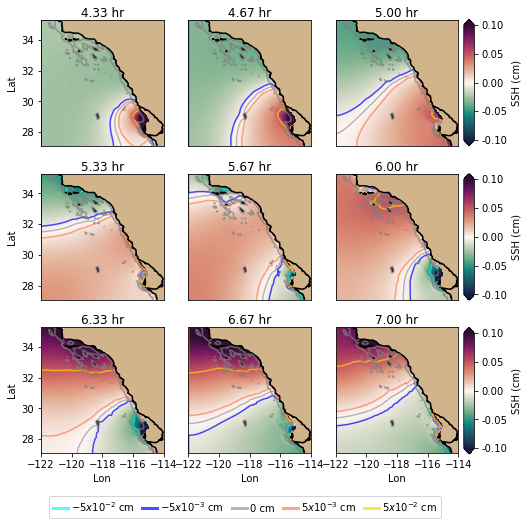

In [6]:
fig, ((ax,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(7.48,8))
axs = [ax,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

for tt, axx in zip(range(26,45,2), axs):
    axx.set_facecolor('tan')
    pc=frame(tt, axx)

for axx in (ax,ax2,ax3,ax4,ax5,ax6):
    axx.set_xticks([])
for axx in (ax7,ax8,ax9):
    axx.set_xlabel('Lon')
for axx in (ax,ax4,ax7):
    axx.set_ylabel('Lat')
for axx in (ax2,ax3,ax5,ax6,ax8,ax9):
    axx.set_yticks([])

cbar_ax = fig.add_axes([0.91, 0.125, 0.02, 0.22]) 
fig.colorbar(pc,cax=cbar_ax, orientation='vertical', 
             format='%1.2f', label='SSH (cm)', pad=0, extend='both')
cbar_ax = fig.add_axes([0.91, 0.392, 0.02, 0.22]) 
fig.colorbar(pc,cax=cbar_ax, orientation='vertical', 
             format='%1.2f', label='SSH (cm)', pad=0, extend='both')
cbar_ax = fig.add_axes([0.91, 0.66, 0.02, 0.22]) 
fig.colorbar(pc,cax=cbar_ax, orientation='vertical', 
             format='%1.2f', label='SSH (cm)', pad=0, extend='both')

custom_lines = [Line2D([0], [0], color='cyan', lw=3, alpha=0.7),
                Line2D([0], [0], color='b', lw=3, alpha=0.7),
                Line2D([0], [0], color='0.6', lw=3, alpha=0.7),
                Line2D([0], [0], color='coral', lw=3, alpha=0.7), 
                Line2D([0], [0], color='gold', lw=3, alpha=0.7)]

ax8.legend(custom_lines, [r'$-5x10^{-2}$ cm', r'$-5x10^{-3}$ cm', 
                          '0 cm',r'$5x10^{-3}$ cm',r'$5x10^{-2}$ cm'],
           bbox_to_anchor=(2.1,-0.3), ncol=5, columnspacing=0.8,
           handletextpad=0.3, handlelength=1.5)
plt.savefig('figure3_bottDrag.png', dpi=500, bbox_inches='tight')
plt.show()